In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA

In [6]:
data=pd.read_csv("spotify_songs_dataset.csv")
data

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,SP49996,Event push do body.,Shelley Robinson,Wrong cup.,Pop,1999-05-26,272.0,38,25078113,Spanish,No,Indie,Melissa Wilson,Leslie Ferguson,Daniel Cruz
49996,SP49997,Share clearly role.,Jennifer Kennedy,That actually.,Folk,2016-08-21,355.0,62,29908581,Korean,Yes,Atlantic Records,Timothy Rice,Randall Martinez,NaN
49997,SP49998,Wonder type simply.,Hailey Walsh,South Democrat.,Pop,1997-02-28,207.0,38,75864558,Spanish,No,Atlantic Records,Susan Diaz,Katrina Fleming,NaN
49998,SP49999,Company.,Leah Coleman,Front.,Electronic,1996-07-15,266.0,10,41817978,English,No,Sony Music,Dr. Zachary Bell,Pam Schultz,NaN


# Dataset Selection:

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   song_id                       50000 non-null  object 
 1   song_title                    50000 non-null  object 
 2   artist                        50000 non-null  object 
 3   album                         50000 non-null  object 
 4   genre                         50000 non-null  object 
 5   release_date                  50000 non-null  object 
 6   duration                      45000 non-null  float64
 7   popularity                    50000 non-null  int64  
 8   stream                        50000 non-null  int64  
 9   language                      47500 non-null  object 
 10  explicit_content              50000 non-null  object 
 11  label                         50000 non-null  object 
 12  composer                      50000 non-null  object 
 13  p

# Data Cleaning (20% of the grade):

In [16]:
#1. Бос орындарды реттеу 
data['duration']=data['duration'].fillna(data['duration'].median())
data['language']= data['language'].fillna("Unknown")
# 2. Деректер типтерін өзгерту
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce') 
#3. Тым көп бос орыны бар бағанда өшіру 
data= data.drop(columns=['collaboration'])

In [18]:
# Қайталанытын мәндерді өшіріп тастау 
data = data.drop_duplicates().reset_index(drop=True)

In [20]:
# IQR (интерквартильный размах) методы арқылы аномалияларды жою 
numerical_cols = ['duration', 'popularity', 'stream']
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)  
    Q3 = data[col].quantile(0.75)  
    IQR = Q3 - Q1                  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49157 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   song_id                       49157 non-null  object        
 1   song_title                    49157 non-null  object        
 2   artist                        49157 non-null  object        
 3   album                         49157 non-null  object        
 4   genre                         49157 non-null  object        
 5   release_date                  49157 non-null  datetime64[ns]
 6   duration                      49157 non-null  float64       
 7   popularity                    49157 non-null  int64         
 8   stream                        49157 non-null  int64         
 9   language                      49157 non-null  object        
 10  explicit_content              49157 non-null  object        
 11  label                         491

# Exploratory Data Analysis (EDA) (30% of the grade):

In [24]:
# 1. Сандық деректер үшін сипаттамалық статистика
desc_stats = data[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max']).transpose()
print("Сандық деректер үшін сипаттамалық статистика")
print(desc_stats)


modes = data[numerical_cols].mode().iloc[0]
print("\nСандық деректердің модасы:")
print(modes)

Сандық деректер үшін сипаттамалық статистика
                    mean      median           std     min         max
duration    2.397004e+02       240.0  4.452055e+01   122.0       357.0
popularity  5.077039e+01        51.0  2.895799e+01     1.0       100.0
stream      5.018789e+07  50393625.0  2.892801e+07  1899.0  99999128.0

Сандық деректердің модасы:
duration          240.0
popularity         93.0
stream        7048773.0
Name: 0, dtype: float64


In [26]:
# 2. Категориялық айнымалыларды талдау
categorical_cols = ['genre', 'language', 'explicit_content']
for col in categorical_cols:
    print(f"\n{col} үшін жиілік:")
    print(data[col].value_counts())


genre үшін жиілік:
genre
Electronic    12372
Pop           12324
Hip-Hop       12080
Folk           2505
Classical      2497
Country        2470
Jazz           2466
R&B            1487
Reggae          956
Name: count, dtype: int64

language үшін жиілік:
language
English     32718
Spanish      4648
Unknown      2470
French       2372
Korean       2293
Italian      1872
Japanese     1398
German       1386
Name: count, dtype: int64

explicit_content үшін жиілік:
explicit_content
Yes    24654
No     24503
Name: count, dtype: int64


In [28]:
#Жанрлар бойынша орташа танымалдық пен жалпы тыңдалу саны
genre_summary = data.groupby('genre').agg({'popularity': 'mean', 'stream': 'sum'}).sort_values(by='stream', ascending=False)
print("\nЖанрлар бойынша орташа танымалдық пен жалпы тыңдалу саны::")
print(genre_summary)


Жанрлар бойынша орташа танымалдық пен жалпы тыңдалу саны::
            popularity        stream
genre                               
Electronic   50.859279  620967639904
Pop          50.678351  615305830419
Hip-Hop      50.907368  606340341122
Folk         51.475050  126768655018
Classical    49.636764  125847723725
Country      51.631174  124612685844
Jazz         50.349959  122324717030
R&B          50.278413   75859638122
Reggae       49.815900   49059027197


In [30]:
# Тілдер мен жанрлардың өзара таралуы
genre_language_dist = data.groupby(['language', 'genre']).size().unstack()
genre_language_dist.head(10)

genre,Classical,Country,Electronic,Folk,Hip-Hop,Jazz,Pop,R&B,Reggae
language,,,,,,,,,
English,1691,1650,8219,1651,8024,1646,8224,988,625
French,104,109,656,112,577,130,564,73,47
German,70,77,337,77,356,70,337,34,28
Italian,97,103,451,93,461,86,474,61,46
Japanese,69,83,313,67,376,61,363,34,32
Korean,102,109,577,131,567,113,565,81,48
Spanish,252,217,1161,238,1139,232,1177,149,83
Unknown,112,122,658,136,580,128,620,67,47


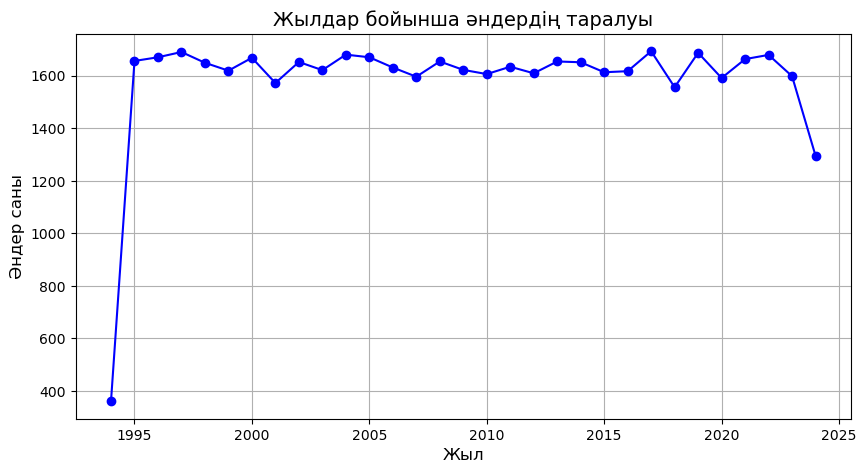

In [34]:
data['year'] = data['release_date'].dt.year
songs_by_year = data['year'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
songs_by_year.plot(kind='line', marker='o', color='blue')
plt.title('Жылдар бойынша әндердің таралуы', fontsize=14)
plt.xlabel('Жыл', fontsize=12)
plt.ylabel('Әндер саны', fontsize=12)
plt.grid(True)
plt.show()

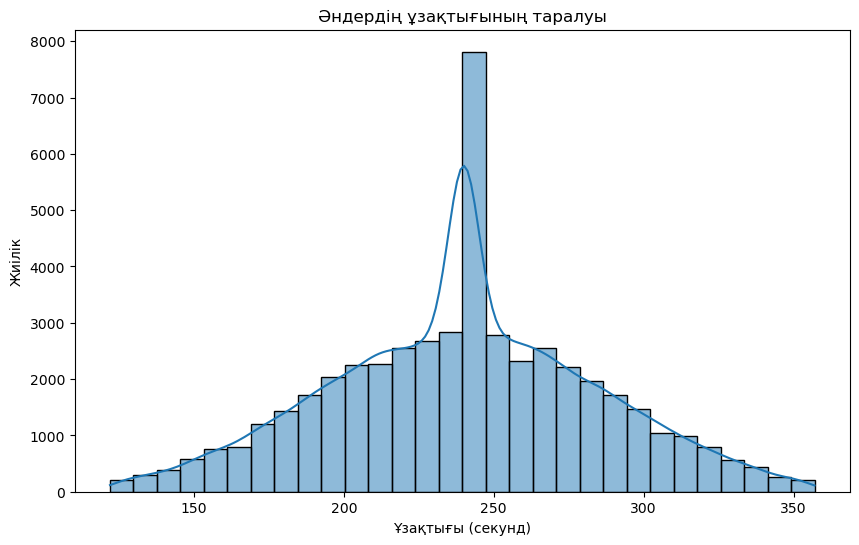

In [36]:
# Әндердің ұзақтығы үшін гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(data['duration'], kde=True, bins=30)
plt.title("Әндердің ұзақтығының таралуы")
plt.xlabel("Ұзақтығы (секунд)")
plt.ylabel("Жиілік")
plt.show()


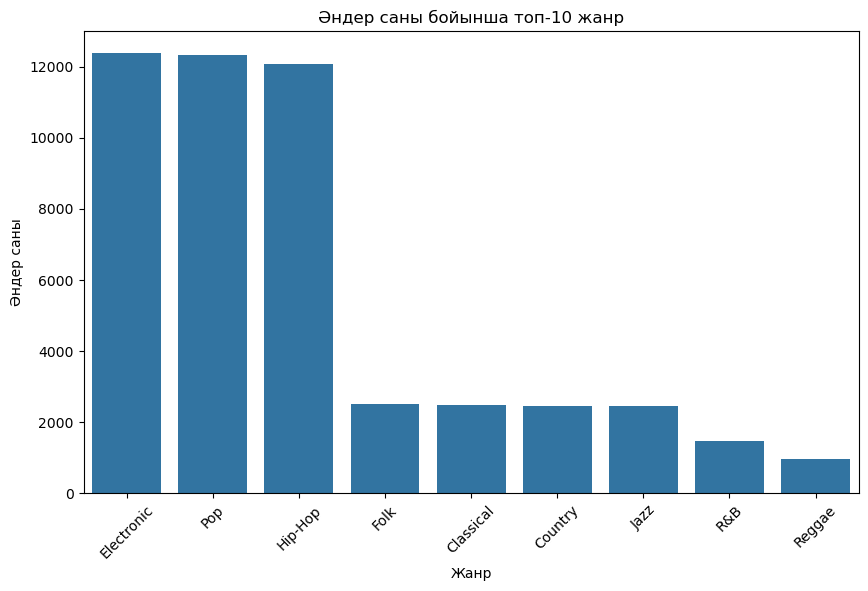

In [38]:
# Категориялық айнымалы үшін бағанды диаграмма (мысалы, жанрлар)
plt.figure(figsize=(10, 6))
top_genres = data['genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title("Әндер саны бойынша топ-10 жанр")
plt.xlabel("Жанр")
plt.ylabel("Әндер саны")
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x600 with 0 Axes>

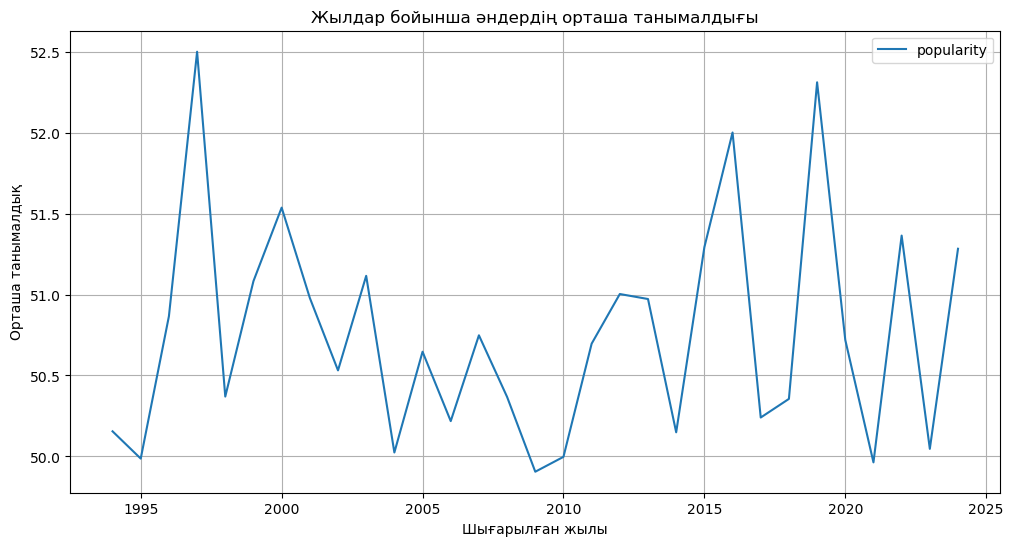

In [40]:
# Сызықтық график (трендтер)
plt.figure(figsize=(12, 6))
data['release_year'] = pd.to_datetime(data['release_date']).dt.year
trend_data = data.groupby('release_year').agg({'popularity': 'mean'})
trend_data.plot(kind='line', figsize=(12, 6))
plt.title("Жылдар бойынша әндердің орташа танымалдығы")
plt.xlabel("Шығарылған жылы")
plt.ylabel("Орташа танымалдық")
plt.grid()
plt.show()


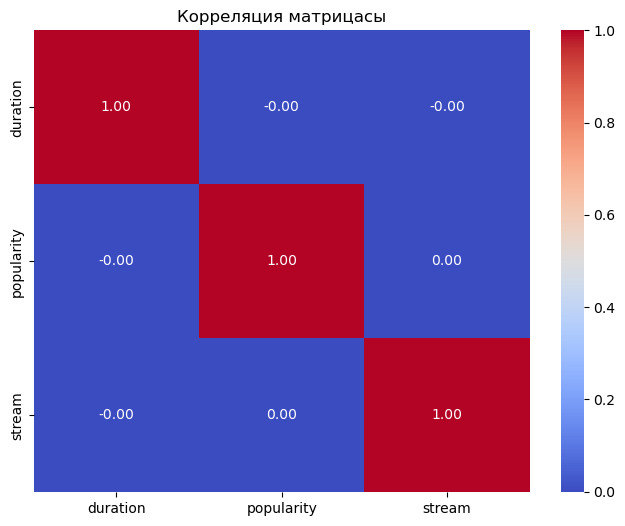

In [42]:
# 4. Корреляцияларды талдау
# Корреляция матрицасы
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция матрицасы")
plt.show()


# Data Transformation and Feature Engineering (20% of the grade):

In [44]:
# 1. Жаңа бағандарды құру

data['duration_to_popularity_ratio'] = data['duration'] / data['popularity']
data['duration_to_popularity_ratio'] = data['duration_to_popularity_ratio'].replace([np.inf, -np.inf], np.nan).fillna(0)


data['explicit_content_numeric'] = data['explicit_content'].map({'Yes': 1, 'No': 0})


data['release_year'] = data['release_date'].dt.year
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49157 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   song_id                       49157 non-null  object        
 1   song_title                    49157 non-null  object        
 2   artist                        49157 non-null  object        
 3   album                         49157 non-null  object        
 4   genre                         49157 non-null  object        
 5   release_date                  49157 non-null  datetime64[ns]
 6   duration                      49157 non-null  float64       
 7   popularity                    49157 non-null  int64         
 8   stream                        49157 non-null  int64         
 9   language                      49157 non-null  object        
 10  explicit_content              49157 non-null  object        
 11  label                         491

In [46]:
# 2. Сүзгілеу және сұрыптау

filtered_data = data[(data['release_year'] > 2010) & (data['popularity'] > 50)]

sorted_data = filtered_data.sort_values(by='popularity', ascending=False)
print("\nСүзгілеу және сұрыптау:")
print(sorted_data[['song_title', 'release_year', 'popularity']].head())



Сүзгілеу және сұрыптау:
                   song_title  release_year  popularity
33607            Movie world.          2012         100
42418  Already work continue.          2020         100
12771      Respond attention.          2015         100
11685       Likely great way.          2023         100
42377       Cut agent travel.          2017         100


In [48]:
# 3. Деректерді біріктіру (қолдануға болатын жағдайда)
# Мысалы, бізде жанрлар туралы қосымша мәліметтері бар басқа деректер жиынтығы бар делік
genre_info = pd.DataFrame({
    'genre': ['Pop', 'Hip-Hop', 'Rock'],
    'avg_popularity': [65, 58, 50],
    'main_language': ['English', 'English', 'English']
})
# Жанры бойынша біріктіру
merged_data = data.merge(genre_info, on='genre', how='left')
print("\nБіріктірілген деректер:")
print(merged_data[['song_title', 'genre', 'avg_popularity', 'main_language']].head())



Біріктірілген деректер:
                song_title       genre  avg_popularity main_language
0  Space executive series.  Electronic             NaN           NaN
1     Price last painting.  Electronic             NaN           NaN
2                   Piece.         Pop            65.0       English
3     Power industry your.     Hip-Hop            58.0       English
4      Food animal second.         Pop            65.0       English


In [50]:
# Индексация, кесінділер және сүзгі
popularity_duration_first_10 = data[['popularity', 'duration']].iloc[26:50]

high_popularity_duration = data[data['popularity'] > 80][['popularity', 'duration']].head()

print(" 26 мен 50 аралығындағы жол үшін 'popularity' және 'duration':")
print(popularity_duration_first_10)
print("\n'popularity' > 80, бағандар 'popularity' және 'duration':")
print(high_popularity_duration)



 26 мен 50 аралығындағы жол үшін 'popularity' және 'duration':
    popularity  duration
26          38     186.0
27          90     271.0
28          14     274.0
29          80     323.0
30          75     188.0
31          82     211.0
32          72     288.0
33          99     240.0
34          65     260.0
35          60     184.0
36          95     194.0
37          39     201.0
38          76     246.0
39          74     319.0
40          39     196.0
41          30     238.0
42          44     194.0
44          43     223.0
45           4     256.0
46          18     150.0
47          42     240.0
48          38     252.0
49          86     234.0
50           4     252.0

'popularity' > 80, бағандар 'popularity' және 'duration':
    popularity  duration
3           86     214.0
10          81     161.0
11          88     345.0
15          83     231.0
17          85     280.0


# Advanced Pandas Features (Optional, 10% extra credit):

In [52]:
# 1. Пайдаланушы функцияларын apply() арқылы пайдалану
# Әндердің ұзақтығына қарай оларды санаттарға бөлу үшін жаңа баған жасау
def classify_duration(duration):
    if duration < 180:
        return "Қысқа"
    elif 180 <= duration <= 300:
        return "Орташа"
    else:
        return "Ұзын"

data['duration_category'] = data['duration'].apply(classify_duration)

# Жаңа бағанмен алғашқы 5 жолды шығару
print("\nӘндерді ұзақтығы бойынша санаттау:")
print(data[['song_title', 'duration', 'duration_category']].head())



Әндерді ұзақтығы бойынша санаттау:
                song_title  duration duration_category
0  Space executive series.     282.0            Орташа
1     Price last painting.     127.0             Қысқа
2                   Piece.     240.0            Орташа
3     Power industry your.     214.0            Орташа
4      Food animal second.     273.0            Орташа


In [54]:
# 2. Свод кесте жасау (pivot table)
# Ұзақтық санаттары бойынша орташа танымалдылық және жалпы тыңдалу санын есептейтін свод кесте
pivot_table = pd.pivot_table(
    data,
    values=['popularity', 'stream'],
    index='duration_category',
    aggfunc={'popularity': 'mean', 'stream': 'sum'}
)
print("\nСвод кесте: Орташа танымалдылық және жалпы тыңдалу саны:")
print(pivot_table)




Свод кесте: Орташа танымалдылық және жалпы тыңдалу саны:
                   popularity         stream
duration_category                           
Орташа              50.769345  1991349674178
Қысқа               50.946232   240067102505
Ұзын                50.600388   235669481698


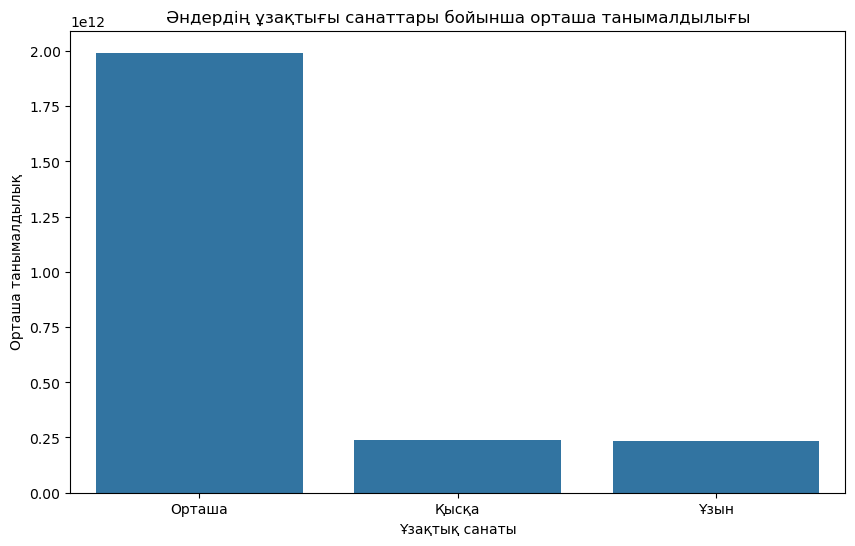

In [56]:
# Свод кестені визуализациялау
pivot_table_plot = pivot_table.reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table_plot, x='duration_category', y='stream')
plt.title("Әндердің ұзақтығы санаттары бойынша орташа танымалдылығы")
plt.xlabel("Ұзақтық санаты")
plt.ylabel("Орташа танымалдылық")
plt.show()

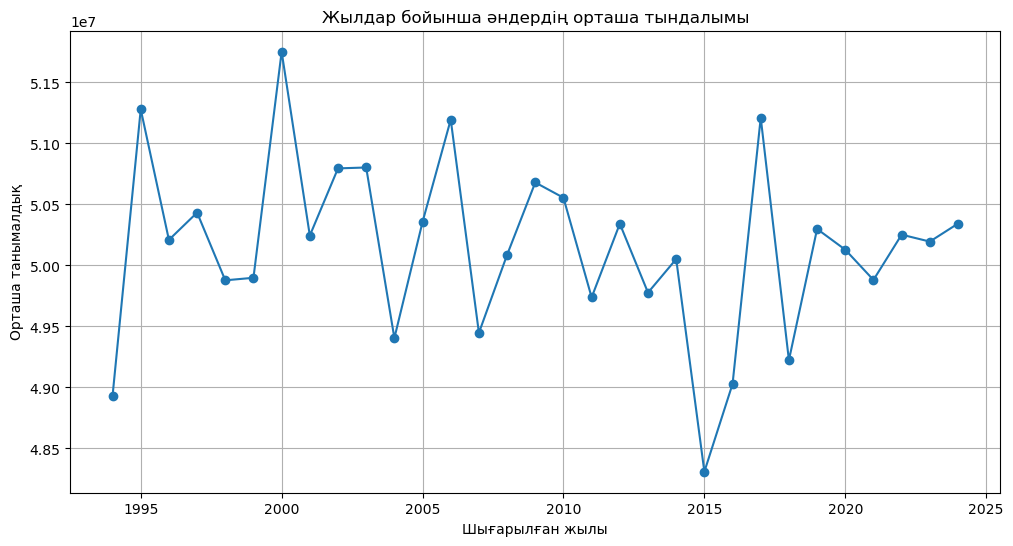

In [60]:
# 3. Уақыт қатарларын талдау
# Уақыттық деректердің бар-жоғын тексеру
if 'release_date' in data.columns:
    # Жыл мен айды бөлек бағандарға қосу
    data['release_year'] = data['release_date'].dt.year
   

    # Қайта іріктеу: жылдар бойынша орташа танымалдылық
    time_series_data = data.groupby('release_year')['stream'].mean()

    # Жылдар бойынша танымалдылық трендін салу
    plt.figure(figsize=(12, 6))
    time_series_data.plot(kind='line', marker='o', title="Жылдар бойынша әндердің орташа тындалымы")
    plt.xlabel("Шығарылған жылы")
    plt.ylabel("Орташа танымалдық")
    plt.grid()
    plt.show()
